In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train_cars.csv")   #write path/train_cars.csv in record

df.head(500)

,date,hour,demand
0,18-08-2018,9,91.0
1,18-08-2018,10,21.0
2,18-08-2018,13,23.0
3,18-08-2018,14,104.0
4,18-08-2018,15,81.0
...,...,...,...
495,19-09-2018,11,36.0
496,19-09-2018,12,54.0
497,19-09-2018,13,24.0
498,19-09-2018,14,65.0


In [2]:
df.count()

date      18247
hour      18247
demand    18243
dtype: int64

In [3]:
df.isna().sum()   #checks if there is any null value

date      0
hour      0
demand    4
dtype: int64

In [4]:
df.dtypes         #df.dtypes

date       object
hour        int64
demand    float64
dtype: object

In [5]:
df['demand'] = df['demand'].fillna(df['demand'].mean())    #df.fillna

In [6]:
df.isna().sum()

date      0
hour      0
demand    0
dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['date'])       #pd.to_datetime

/tmp/ipykernel_6387/1162143821.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])       #pd.to_datetime


In [8]:
df['year'] = df['date'].apply(lambda x:x.year)

In [9]:
df['month'] = df['date'].apply(lambda x:x.month)

In [10]:
df['day'] = df['date'].apply(lambda x:x.day)

In [11]:
df['dayofweek'] = df['date'].apply(lambda x:x.dayofweek)

In [12]:
df['isquarterdate'] = df['date'].apply(lambda x:x.quarter)

In [13]:
df['isweekend']=df['dayofweek'].apply(lambda x:1 if x>4 else 0)

In [14]:
df.drop(['date'],axis=1,inplace=True)

In [15]:
def timeOfDay(n):
    if n in range(1,4):
        return "Late Night"
    elif n in range(4,7):
        return "Early Morning"
    elif n in range(7,12):
        return "Morning"
    elif n in range(12,15):
        return "After Noon"
    elif n in range(15,18):
        return "Evening"
    elif n in range(18,25) or n==0:
        return "Night"

In [16]:
df['timeofday'] = df['hour'].apply(lambda x:timeOfDay(x))

In [17]:
df.columns

Index(['hour', 'demand', 'year', 'month', 'day', 'dayofweek', 'isquarterdate',
       'isweekend', 'timeofday'],
      dtype='object')

In [18]:
def monthToSeasons(n):
    if n in [9,10,11]:
        return "Spring"
    elif n in [12,1,2]:
        return "Summer"
    elif n in [3,4,5]:
        return "Autumn"
    elif n in [6,7,8]:
        return "Winter"

In [19]:
df['seasons'] = df['month'].apply(lambda x:monthToSeasons(x))

In [20]:
df

,hour,demand,year,month,day,dayofweek,isquarterdate,isweekend,timeofday,seasons
0,9,91.0,2018,8,18,5,3,1,Morning,Winter
1,10,21.0,2018,8,18,5,3,1,Morning,Winter
2,13,23.0,2018,8,18,5,3,1,After Noon,Winter
3,14,104.0,2018,8,18,5,3,1,After Noon,Winter
4,15,81.0,2018,8,18,5,3,1,Evening,Winter
...,...,...,...,...,...,...,...,...,...,...
18242,19,95.0,2021,2,28,6,1,1,Night,Summer
18243,20,88.0,2021,2,28,6,1,1,Night,Summer
18244,21,39.0,2021,2,28,6,1,1,Night,Summer
18245,22,104.0,2021,2,28,6,1,1,Night,Summer


In [21]:
df.dtypes

hour               int64
demand           float64
year               int64
month              int64
day                int64
dayofweek          int64
isquarterdate      int64
isweekend          int64
timeofday         object
seasons           object
dtype: object

/tmp/ipykernel_6387/197722869.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[elem],y=df['demand'],palette='Set2')


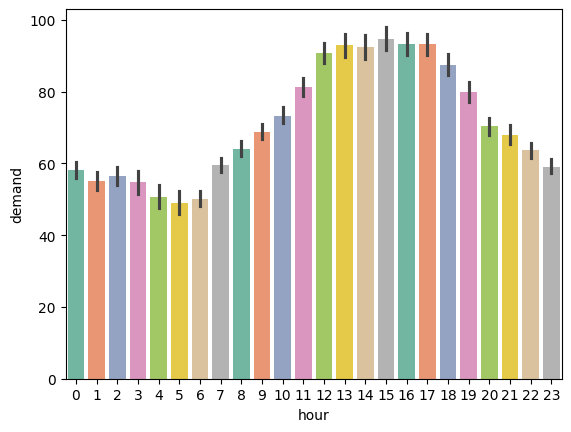

/tmp/ipykernel_6387/197722869.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[elem],y=df['demand'],palette='Set2')


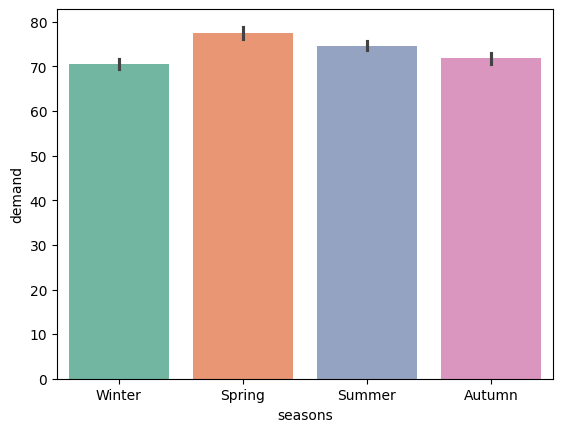

/tmp/ipykernel_6387/197722869.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[elem],y=df['demand'],palette='Set2')


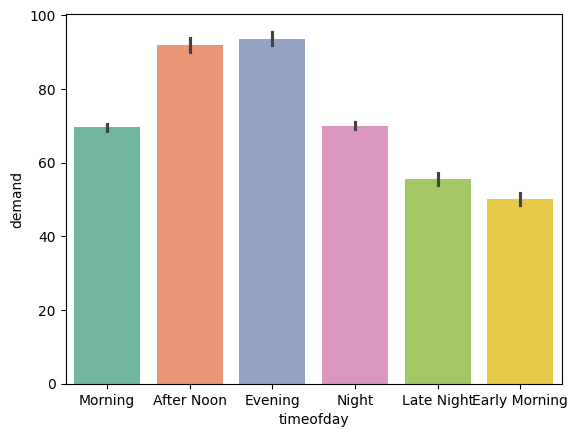

In [22]:
for elem in ['hour','seasons','timeofday']:
    sns.barplot(x=df[elem],y=df['demand'],palette='Set2')
    plt.show()